In [1]:
#install the library on your host machine using: pip install bls (in conda if conda is interpreter)
#import libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

In [2]:
#wages = bls.get_series('CIU2020000000000A') #get wagese data
#wages.to_csv('wages_data.csv') #write it to csv file
wages_data = pd.read_csv('wages_data.csv')
wages_data.columns = 'Date', 'Wages'
wages_data.head()

#wages show the annual average growth in %..
#e.g. 2013Q1 1.7% means if the trend continued it would be annul average growth

,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7


In [3]:
#cpi = bls.get_series('CUUR0000SA0') #get cpi data
#cpi.to_csv('cpi_data.csv') #write it to csv
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date', 'CPI'
cpi_data.head()

,Date,CPI
0,2013-01,230.280
1,2013-02,232.166
2,2013-03,232.773
3,2013-04,232.531
4,2013-05,232.945


In [4]:
#clean and manipulate data as wages are monthly and cpi quarterly measured
#along with wages shown in percentages, while the cpi is points

cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1') #replace each instance -03 in Date colum with Q1
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')

cpi_data = cpi_data[cpi_data.Date.str.contains('-') == False] #delete other rows containing '-'

cpi_data.head()

,Date,CPI
2,2013Q1,232.773
5,2013Q2,233.504
8,2013Q3,234.149
11,2013Q4,233.049
14,2014Q1,236.293


In [11]:
##wages - divide each quarterly growth rate by four. This would be gross simplification of the process
# taking presumtion that the real changes to wages during those three months were exactly one quarter of the reported year-over-year rate. 
#determine baseline for calculation, that is 1st cpi value from the dataframe

#wagesam = bls.get_series('CIU2020000000000A') #read rata
#wagesam.to_csv('bls_wages_data_csv') #write to csv
df = pd.read_csv('bls_wages_data_csv') #read csv and save to dataframe
df.columns = 'Date','Wages' #rename columns

newdf = df 
newnum = pd.read_csv('cpi_data.csv')
newnum= newnum['CUUR0000SA0'][0] #assign starting CPI as baseline value
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum #convert wages from percentages to points and multiply by baseline to get approximative CPI
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

newwages.head()

,Date,Wages
0,2013Q1,231.258690
1,2013Q2,232.357169
2,2013Q3,233.402776
3,2013Q4,234.628141
4,2014Q1,235.625310


In [13]:
#merge the data
merged_data = pd.merge(cpi_data, newwages, on='Date')
merged_data.head()

,Date,CPI,Wages
0,2013Q1,232.773,231.258690
1,2013Q2,233.504,232.357169
2,2013Q3,234.149,233.402776
3,2013Q4,233.049,234.628141
4,2014Q1,236.293,235.625310


Text(0.5, 0, 'Dates')

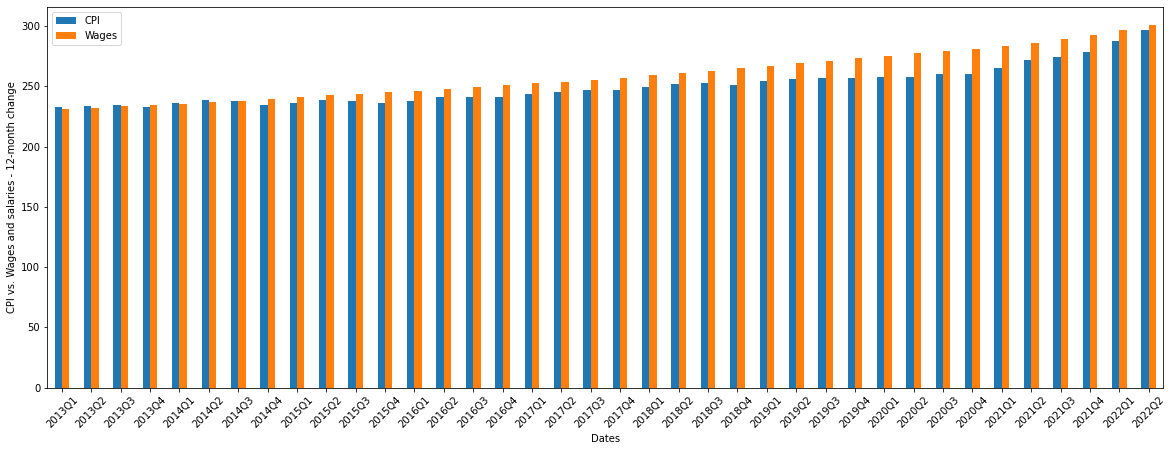

In [14]:
#plot the data
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

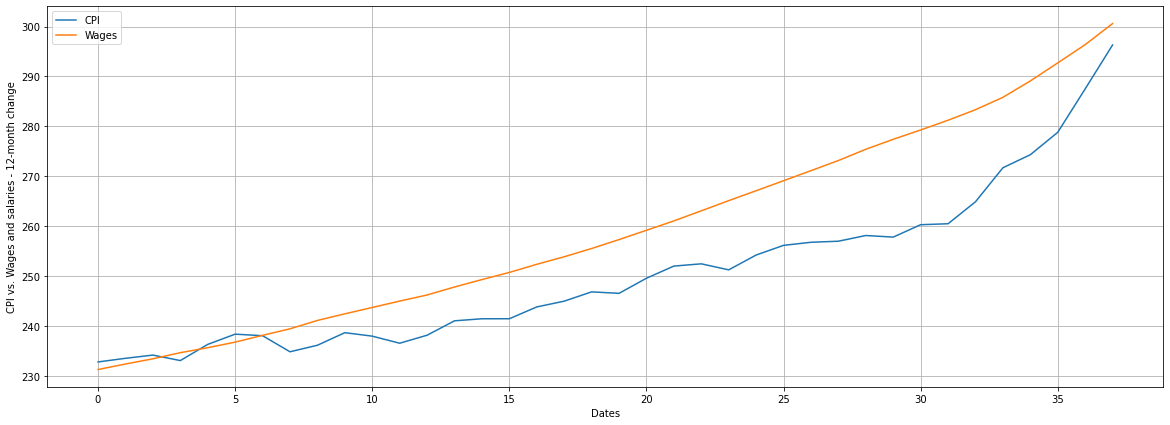

In [15]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()

In [30]:
#alternative plots
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=merged_data['Date'], 
                                y=merged_data['CPI'], 
                                name = 'CPI'
                                ))
fig.add_trace(go.Scatter(x=merged_data['Date'], y=merged_data['Wages'], mode='lines', name='Approximated CPI'))
fig.update_layout(title='Consumer Price Index vs Approximated Consumer Prices Index based on Monthly Wages',
                   xaxis_title='Quarter',
                   yaxis_title='CPI / Approximated CPI')
fig.show()